# Getting the input: Data I/O and visualization

> *Nov 22, 2019 — Kai T. Ohlhus &lt;<k.ohlhus@gmail.com>&gt; — [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/)*

- Plotting: `plot()`, `stem()`, `mesh()`, ...
- Data I/O: `load()`, `save()`, `csvread()`, ...

# Plotting

When rendering **non-ASCII** characters, make sure to select a font which
supports the respective characters.  GNU Octave's default font "FreeSans" does,
for example, not support Japanese characters, but "IPAGothic" does.

Additionally, the "gnuplot" graphics toolkit (default in Jupyter) has either
problems with rendering non-ASCII characters.  Choose the "qt" toolkit
(default in Octave's GUI) to get around this issue.

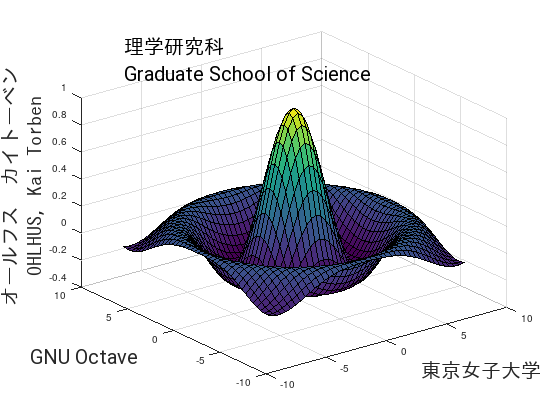

In [1]:
graphics_toolkit ("qt");
fs = {"FontSize", 20};
en = {"FontName", "SansSerif", fs{:}};
jp = {"FontName", "IPAGothic", fs{:}};

sombrero ();

xlabel ("東京女子大学", jp{:});
ylabel ("GNU Octave", en{:});
zlabel ("オールフス　カイトーベン\nOHLHUS, Kai Torben", jp{:});

text (-8, 8, 1.4, "理学研究科", jp{:});
text (-8, 8, 1.2, "Graduate School of Science", en{:});

# Two selected formats

## Excel

- Make use of the **Octave Forge io package**
- `Financial Sample.xlsx` from
  https://go.microsoft.com/fwlink/?LinkID=521962


In [2]:
clear all
pkg load io
[num_data,txt_data,raw_cell_data] ...
= xlsread ('Financial Sample.xlsx', 1, 'A1:P3');
num_data

Detected XLS interfaces: num_data =

 Columns 1 through 5:

    1618.50000       3.00000      20.00000   32370.00000       0.00000
    1321.00000       3.00000      20.00000   26420.00000       0.00000

 Columns 6 through 10:

   32370.00000   16185.00000   16185.00000   41640.00000       1.00000
   26420.00000   13210.00000   13210.00000   41640.00000       1.00000



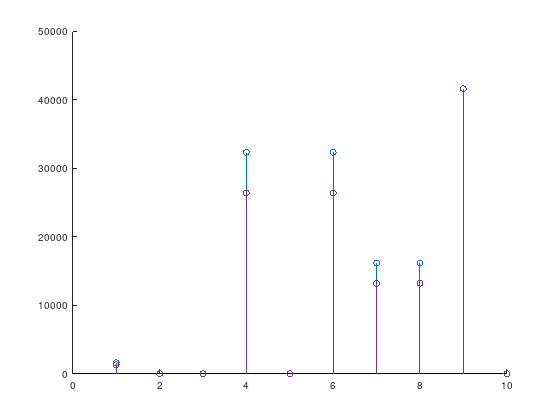

In [3]:
stem (num_data')

## Matrix Market

- `mmread.m` from
  https://math.nist.gov/MatrixMarket/mmio/matlab/mmiomatlab.html
- `bcsstm07.mtx.gz` from
  https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/bcsstruc1/bcsstm07.html

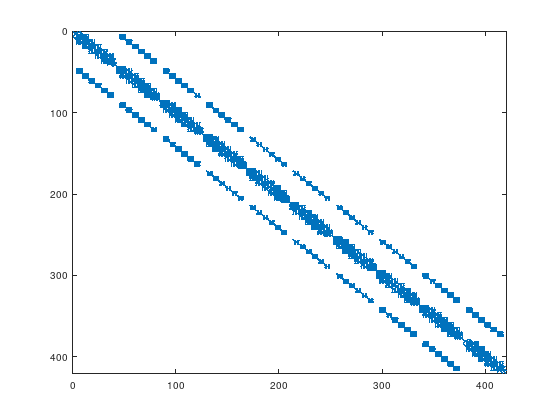

In [4]:
clear all
if (exist ("bcsstm07.mtx.gz", "file") == 2)
   gunzip ("bcsstm07.mtx.gz")
endif
A = mmread ("bcsstm07.mtx");
spy (A);

In [5]:
[V,E] = eig (A, "vector");
max (E)
min (E)
isdefinite (A)

ans =  2510.4
ans =  0.32966
ans = 1
